## Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding 
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
1.One of the reasons that the shipwreck led to such loss of life was that there were not 
enough lifeboats for the passengers and crew.
2. Although there was some element of luck involved in surviving the sinking, some groups of 
people were more likely to survive than others, such as women, children, and the upperclass.
The problem associated with the Titanic dataset is to predict whether a passenger survived the 
disaster or not. The dataset contains various features such as passenger class, age, gender, 
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can 
be used to build a predictive model to determine the likelihood of a passenger surviving the 
disaster. The dataset offers opportunities for feature engineering, data visualization, and model 
selection, making it a valuable resource for developing and testing data analysis and machine 
learning skills.

In [1]:
# Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
# checking the dataype of the parameters(Columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
# To know columns
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Perform descriptive statistics on the dataset

In [7]:
# Descriptive Analysis
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Perform Below Visualization
● Univariate Analysis
● Bi - Variate Analysis
● Multi - Variate Analysis

## Univariate Analysis:
Univariate analysis involves examining the distribution and characteristics of individual variables.


### a. Histogram:

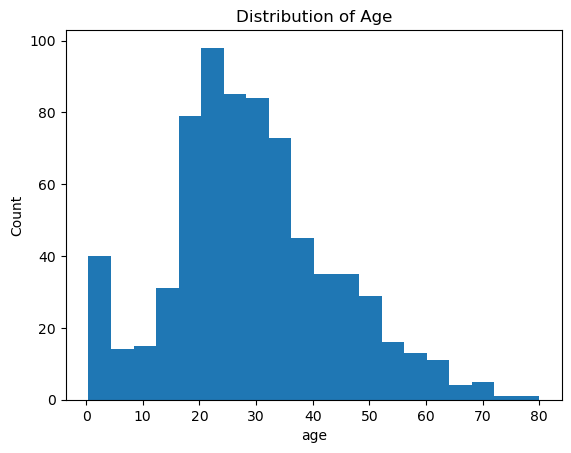

In [8]:
import matplotlib.pyplot as plt

# Histogram for the 'Age' variable
plt.hist(data['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

### b. Bar Chart:

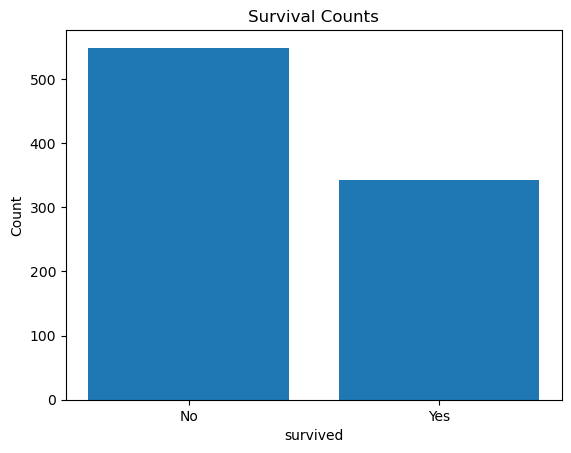

In [9]:
# Bar chart for the 'Survived' variable
survived_counts = data['survived'].value_counts()
plt.bar(survived_counts.index, survived_counts.values)
plt.xlabel('survived')
plt.ylabel('Count')
plt.title('Survival Counts')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### c. Pie Chart:

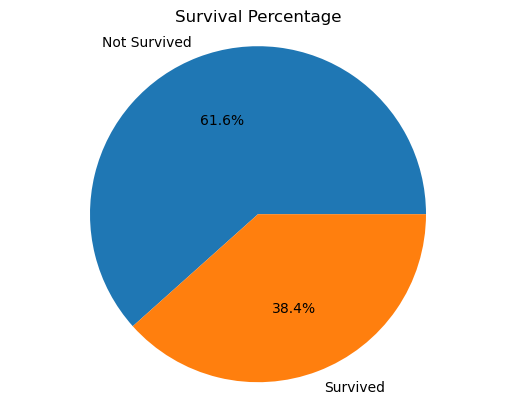

In [10]:
import matplotlib.pyplot as plt

# Pie chart for the 'Survived' variable
survived_counts = data['survived'].value_counts()
labels = ['Not Survived', 'Survived']

plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.title('Survival Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


## Bi-Variate Analysis:
Bi-variate analysis involves examining the relationship between two variables.

### a. Scatter Plot:

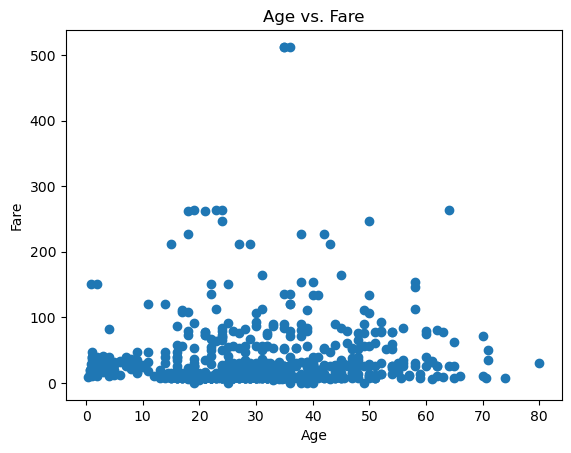

In [11]:
# Scatter plot for 'Age' vs. 'Fare'
plt.scatter(data['age'], data['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

### b. Box Plot:

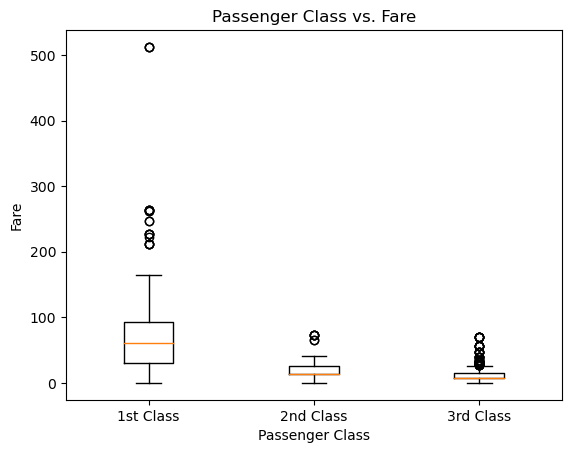

In [12]:
# Box plot for 'Pclass' vs. 'Fare'
plt.boxplot([data[data['pclass'] == 1]['fare'],
             data[data['pclass'] == 2]['fare'],
             data[data['pclass'] == 3]['fare']],
            labels=['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Passenger Class vs. Fare')
plt.show()

## Multi-Variate Analysis:
Multi-variate analysis involves analyzing the relationship between multiple variables simultaneously.

### a. Heatmap:

C:\Users\harsh\AppData\Local\Temp\ipykernel_5144\1094585641.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


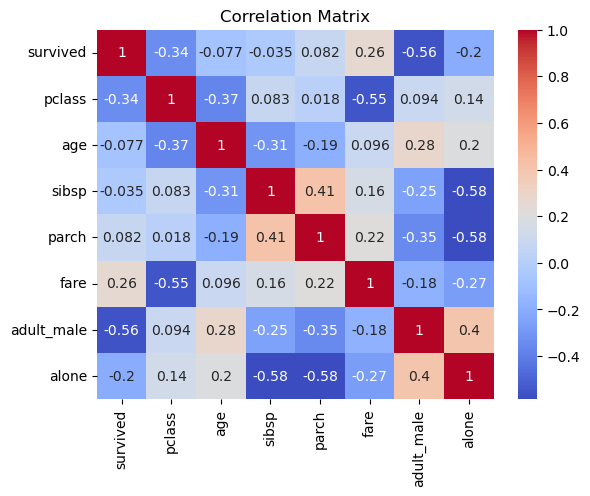

In [13]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### b. Pairplot:

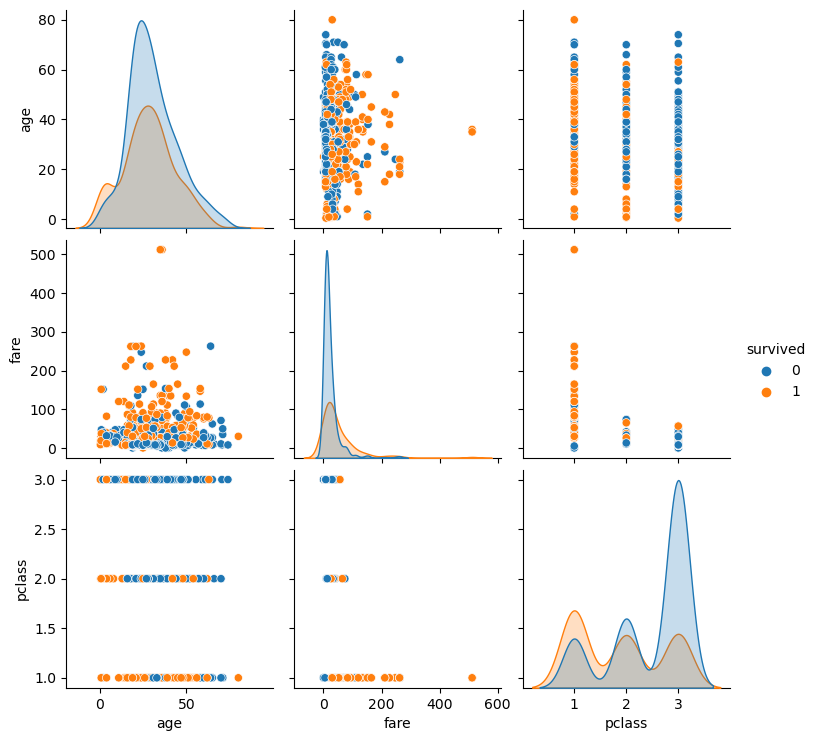

In [14]:
# Select relevant variables for pairplot
pairplot_vars = ['age', 'fare', 'pclass', 'survived']

# Create a pairplot
sns.pairplot(data[pairplot_vars].dropna(), hue='survived')
plt.show()

## Handle the Missing values

In [15]:
data.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [17]:
#Check for missing values 
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
# Handle missing values
# Drop rows with missing values
data.dropna(inplace=True)
# Fill missing values with the mean
data['age'].fillna(data['age'].mean(), inplace=True)
# Fill missing values with the most frequent value
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
# Check for missing values again
print(data.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


## Find the outliers and replace the outliers

In [19]:
# Plot histograms of 'Age' and 'Fare' columns before and after replacing outliers
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Age (Before Replacing Outliers)')

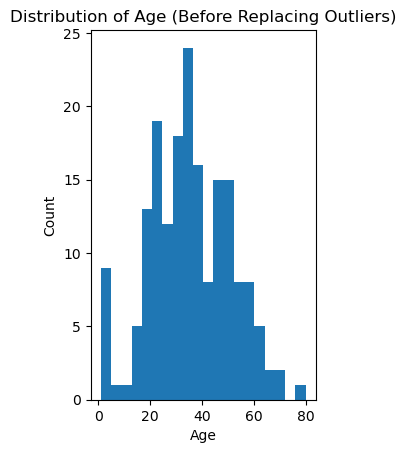

In [20]:
# Histogram before replacing outliers
plt.subplot(1, 2, 1)
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age (Before Replacing Outliers)')


Text(0.5, 1.0, 'Distribution of Fare (Before Replacing Outliers)')

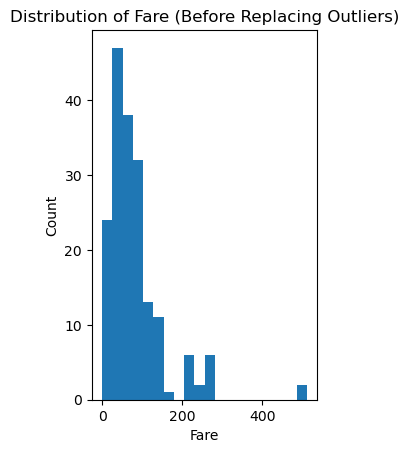

In [21]:
# Histogram after replacing outliers
plt.subplot(1, 2, 2)
plt.hist(data['fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare (Before Replacing Outliers)')

In [22]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [23]:
# Display the modified dataset with replaced outliers
print(data.head())

    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  


## Check for Categorical columns and perform encoding

In [24]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)



Categorical columns: Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')


In [25]:
# Perform one-hot encoding
titanic_encoded = pd.get_dummies(data, columns=categorical_columns)
print("Encoded dataset:")
print(titanic_encoded.head())


Encoded dataset:
    survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
1          1       1  38.0      1      0  71.2833       False  False   
3          1       1  35.0      1      0  53.1000       False  False   
6          0       1  54.0      0      0  51.8625        True   True   
10         1       3   4.0      1      1  16.7000       False  False   
11         1       1  58.0      0      0  26.5500       False   True   

    sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
1            1         0  ...       1       0       0       0       0   
3            1         0  ...       1       0       0       0       0   
6            0         1  ...       0       0       1       0       0   
10           1         0  ...       0       0       0       0       1   
11           1         0  ...       1       0       0       0       0   

    embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  \
1                       1        

## Split the data into dependent and independent variables

In [26]:

X = data.drop('survived', axis=1)  # Independent variables 
y = data['survived']  # Dependent variable 

# Display the independent variables 
print("Independent variables")
print(X.head())

Independent variables
    pclass     sex   age  sibsp  parch     fare embarked  class    who  \
1        1  female  38.0      1      0  71.2833        C  First  woman   
3        1  female  35.0      1      0  53.1000        S  First  woman   
6        1    male  54.0      0      0  51.8625        S  First    man   
10       3  female   4.0      1      1  16.7000        S  Third  child   
11       1  female  58.0      0      0  26.5500        S  First  woman   

    adult_male deck  embark_town alive  alone  
1        False    C    Cherbourg   yes  False  
3        False    C  Southampton   yes  False  
6         True    E  Southampton    no   True  
10       False    G  Southampton   yes  False  
11       False    C  Southampton   yes   True  


In [27]:
# Display the dependent variable 
print("\nDependent variable")
print(y.head())


Dependent variable
1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64


## Scale the independent variables

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['age', 'sibsp', 'parch', 'fare']

# Scale the numerical variables
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Display the scaled independent variables
print("Scaled Independent variables")
print(X.head())


Scaled Independent variables
    pclass     sex       age     sibsp     parch      fare embarked  class  \
1        1  female  0.152082  0.828576 -0.634159 -0.100110        C  First   
3        1  female -0.039875  0.828576 -0.634159 -0.338485        S  First   
6        1    male  1.175852 -0.726072 -0.634159 -0.354708        S  First   
10       3  female -2.023430  0.828576  0.692472 -0.815672        S  Third   
11       1  female  1.431795 -0.726072 -0.634159 -0.686543        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  


## Split the data into training and testing

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 14) (712,)
Testing set shape: (179, 14) (179,)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 14)
(179, 14)
(712,)
(179,)
